In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import matplotlib.dates as mdates
from collections import Counter

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Loading and Previewing Data

In [2]:
mcu_data = pd.read_csv('./mcu_box_office.csv')

In [3]:
mcu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   movie_title           27 non-null     object
 1   mcu_phase             27 non-null     int64 
 2   release_date          27 non-null     object
 3   tomato_meter          27 non-null     int64 
 4   audience_score        27 non-null     int64 
 5   movie_duration        27 non-null     int64 
 6   production_budget     27 non-null     object
 7   opening_weekend       27 non-null     object
 8   domestic_box_office   27 non-null     object
 9   worldwide_box_office  27 non-null     object
dtypes: int64(4), object(6)
memory usage: 2.2+ KB


In [4]:
mcu_data.head()

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office
0,Iron Man,1,5/2/2008,94,91,126,"186,000,000","102,118,668","318,604,126","585,171,547"
1,The Incredible Hulk,1,6/13/2008,67,70,112,"137,500,000","55,414,050","134,806,913","265,573,859"
2,Iron Man 2,1,5/7/2010,72,71,124,"170,000,000","128,122,480","312,433,331","621,156,389"
3,Thor,1,5/6/2011,77,76,113,"150,000,000","65,723,338","181,030,624","449,326,618"
4,Captain America: The First Avenger,1,7/22/2011,79,75,124,"140,000,000","65,058,524","176,654,505","370,569,776"


## Reformatting Data

In [5]:
money_columns = ['production_budget', 'opening_weekend', 'domestic_box_office', 'worldwide_box_office']
for col in money_columns:
    mcu_data[col] = mcu_data[col].str.replace(',', '').astype(int)

In [6]:
mcu_data['release_date'] = pd.to_datetime(mcu_data['release_date'])
mcu_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   movie_title           27 non-null     object        
 1   mcu_phase             27 non-null     int64         
 2   release_date          27 non-null     datetime64[ns]
 3   tomato_meter          27 non-null     int64         
 4   audience_score        27 non-null     int64         
 5   movie_duration        27 non-null     int64         
 6   production_budget     27 non-null     int64         
 7   opening_weekend       27 non-null     int64         
 8   domestic_box_office   27 non-null     int64         
 9   worldwide_box_office  27 non-null     int64         
dtypes: datetime64[ns](1), int64(8), object(1)
memory usage: 2.2+ KB


In [7]:
mcu_data['net_profit'] = mcu_data['worldwide_box_office'] - mcu_data['production_budget']

## Summary Statistics

### Total Number of Movies

In [8]:
print(len(mcu_data))

27


### First and Most Recent Movie

In [9]:
# FIRST MOVIE
print(mcu_data.sort_values('release_date').loc[0, ['movie_title', 'release_date']])

movie_title                Iron Man
release_date    2008-05-02 00:00:00
Name: 0, dtype: object


In [10]:
# MOST RECENT
print(mcu_data.sort_values('release_date').loc[26, ['movie_title', 'release_date']])

movie_title     Spider-Man: No Way Home
release_date        2021-12-17 00:00:00
Name: 26, dtype: object


### Total Earnings and Total Cost

In [11]:
# Total Earnings
print(mcu_data['worldwide_box_office'].sum())

25665795651


In [12]:
# Total Production
print(mcu_data['production_budget'].sum())

5278500000


### Creating DataFrames and Counter for Analysis

In [13]:
critic_ranked = mcu_data.sort_values('tomato_meter', ascending=False)
viewer_rating = mcu_data.sort_values('audience_score', ascending=False)
worldwide_box_office = mcu_data.sort_values('worldwide_box_office', ascending=False)
opening_weekend = mcu_data.sort_values('opening_weekend', ascending=False)
net_profit = mcu_data.sort_values('net_profit', ascending=False)

In [14]:
standings = Counter(mcu_data['movie_title'])
for title in standings:
    standings[title] = 0

In [15]:
labels = {
    'tomato_meter': 'Critic Score',
    'audience_score': 'Audience Score',
    'worldwide_box_office': 'Worldwide Box Office Earnings',
    'opening_weekend': 'Opening Weekend Earnings',
    'net_profit': 'Net Profit Earnings'
}

In [16]:
def addPointsToStandings(data, standings):
    for (i, title) in enumerate(data):
        points = 27 - i
        standings[title] += points
    return standings

In [17]:
def displayBarGraph(df, x_val):
    data = df.head(10)
    label = labels[x_val]
    fig, ax = plt.subplots(figsize=(15,10))
    sns.set_context('talk')
    sns.barplot(y='movie_title', x=x_val, data=data, ax=ax, hue='mcu_phase', dodge=False)
    plt.ylabel('MCU Movie Titles', fontsize=20)
    plt.xlabel(label, fontsize=20)
    ax.set_title(label=f'Top 10 MCU Movies Ranked by {label}', fontdict={
        'fontsize': 28,
        'fontweight': 'bold',
    })
    for container in ax.containers:
        if x_val == 'tomato_meter' or x_val == 'audience_score':
            fmt = '%d'
        else:
            fmt = '%.3e'
        ax.bar_label(container, fmt=fmt, label_type='center')
    ax.legend(loc='center right', bbox_to_anchor=(1.15, 0.5), fancybox=True, shadow=True, title='MCU Phase')
    plt.savefig(f'./assets/charts/{label}_top_10.png', dpi=fig.dpi, bbox_inches='tight')

### Opening Weekend 

In [18]:
standings = addPointsToStandings(opening_weekend['movie_title'], standings)
print(standings)

Counter({'Avengers: End Game': 27, 'Spider-Man: No Way Home': 26, 'Avengers: Infinity War': 25, 'The Avengers': 24, 'Black Panther': 23, 'Avengers: Age of Ultron': 22, 'Captain America: Civil War': 21, 'Iron Man 3': 20, 'Captain Marvel': 19, 'Guardians of the Galaxy Vol. 2': 18, 'Iron Man 2': 17, 'Thor: Ragnarok': 16, 'Spider-Man: Homecoming': 15, 'Iron Man': 14, 'Captain America: The Winter Soldier': 13, 'Guardians of the Galaxy': 12, 'Spider-Man: Far From Home': 11, 'Thor: The Dark World': 10, 'Doctor Strange': 9, 'Black Widow': 8, 'Ant-Man and the Wasp': 7, 'Shang-Chi and the Legend of the Ten Rings': 6, 'Eternals': 5, 'Thor': 4, 'Captain America: The First Avenger': 3, 'Ant-Man': 2, 'The Incredible Hulk': 1})


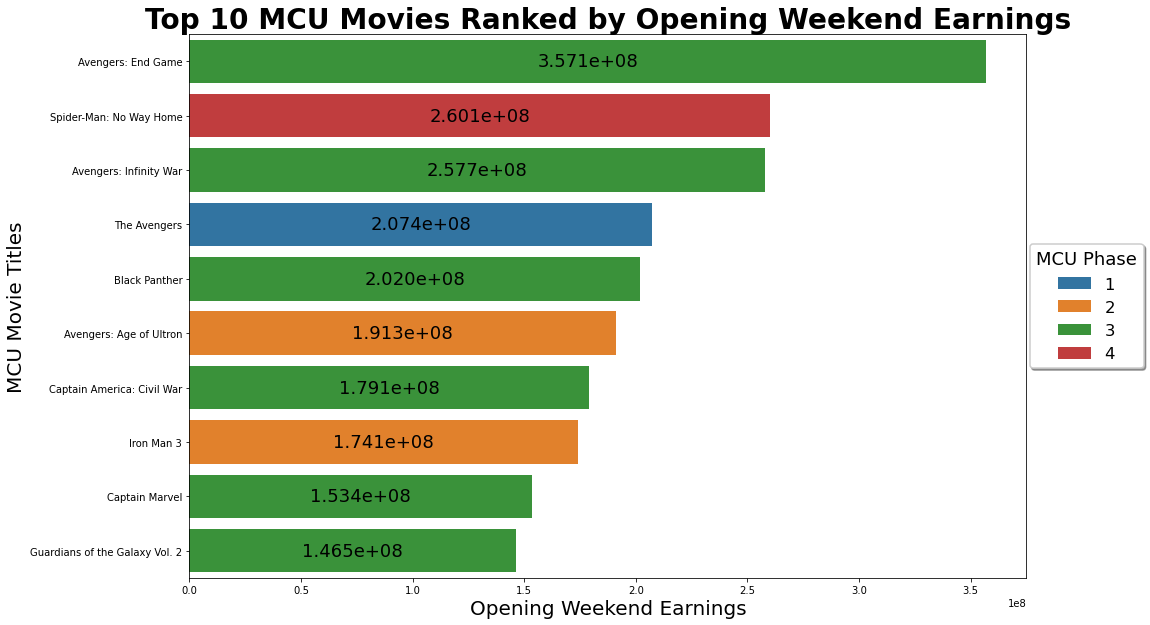

In [19]:
displayBarGraph(opening_weekend, 'opening_weekend')

### Worldwide Box Office

In [20]:
standings = addPointsToStandings(worldwide_box_office['movie_title'], standings)
print(standings)

Counter({'Avengers: End Game': 54, 'Avengers: Infinity War': 51, 'Spider-Man: No Way Home': 51, 'The Avengers': 48, 'Avengers: Age of Ultron': 45, 'Black Panther': 45, 'Iron Man 3': 41, 'Captain America: Civil War': 41, 'Captain Marvel': 37, 'Guardians of the Galaxy Vol. 2': 34, 'Spider-Man: Homecoming': 32, 'Thor: Ragnarok': 31, 'Spider-Man: Far From Home': 30, 'Iron Man 2': 26, 'Captain America: The Winter Soldier': 26, 'Guardians of the Galaxy': 26, 'Iron Man': 22, 'Thor: The Dark World': 21, 'Doctor Strange': 21, 'Ant-Man and the Wasp': 17, 'Black Widow': 11, 'Shang-Chi and the Legend of the Ten Rings': 11, 'Thor': 10, 'Ant-Man': 9, 'Eternals': 9, 'Captain America: The First Avenger': 5, 'The Incredible Hulk': 2})


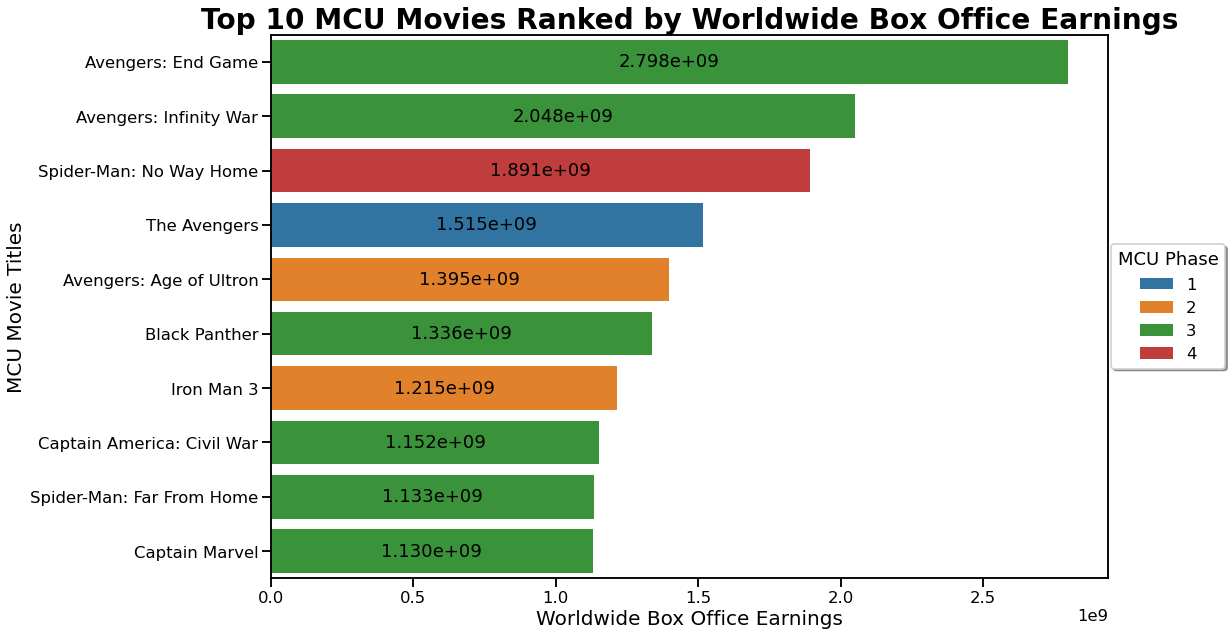

In [21]:
displayBarGraph(worldwide_box_office, 'worldwide_box_office')

### Net Profit

In [22]:
standings = addPointsToStandings(net_profit['movie_title'], standings)
print(standings)

Counter({'Avengers: End Game': 81, 'Avengers: Infinity War': 77, 'Spider-Man: No Way Home': 76, 'The Avengers': 72, 'Black Panther': 68, 'Avengers: Age of Ultron': 67, 'Iron Man 3': 62, 'Captain America: Civil War': 59, 'Captain Marvel': 56, 'Spider-Man: Far From Home': 50, 'Guardians of the Galaxy Vol. 2': 49, 'Spider-Man: Homecoming': 49, 'Thor: Ragnarok': 47, 'Guardians of the Galaxy': 40, 'Captain America: The Winter Soldier': 39, 'Iron Man 2': 35, 'Doctor Strange': 33, 'Thor: The Dark World': 32, 'Iron Man': 30, 'Ant-Man and the Wasp': 27, 'Thor': 16, 'Ant-Man': 16, 'Shang-Chi and the Legend of the Ten Rings': 16, 'Black Widow': 13, 'Eternals': 12, 'Captain America: The First Avenger': 9, 'The Incredible Hulk': 3})


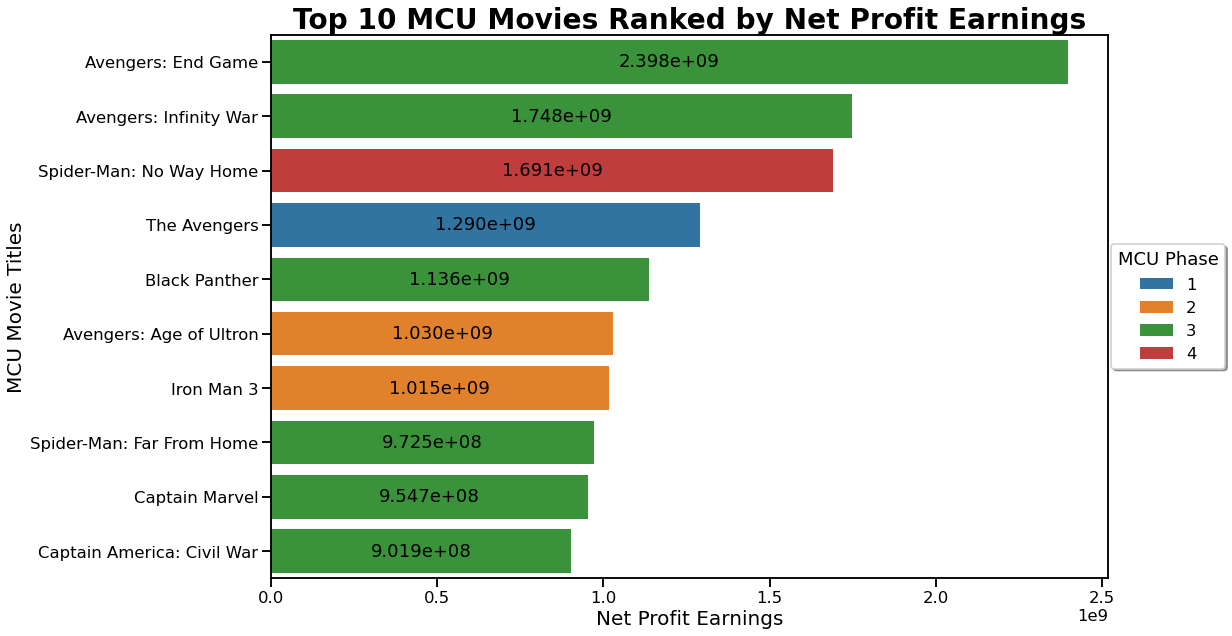

In [23]:
displayBarGraph(net_profit, 'net_profit')

### Critic Rankings

In [24]:
standings = addPointsToStandings(critic_ranked['movie_title'], standings)
print(standings)

Counter({'Avengers: End Game': 106, 'Spider-Man: No Way Home': 99, 'Black Panther': 95, 'The Avengers': 92, 'Avengers: Infinity War': 89, 'Captain America: Civil War': 77, 'Iron Man 3': 72, 'Avengers: Age of Ultron': 72, 'Thor: Ragnarok': 71, 'Spider-Man: Homecoming': 70, 'Spider-Man: Far From Home': 66, 'Captain Marvel': 65, 'Guardians of the Galaxy': 62, 'Guardians of the Galaxy Vol. 2': 62, 'Iron Man': 56, 'Captain America: The Winter Soldier': 56, 'Doctor Strange': 48, 'Ant-Man and the Wasp': 41, 'Iron Man 2': 39, 'Shang-Chi and the Legend of the Ten Rings': 35, 'Thor: The Dark World': 34, 'Ant-Man': 27, 'Thor': 22, 'Black Widow': 21, 'Captain America: The First Avenger': 16, 'Eternals': 13, 'The Incredible Hulk': 6})


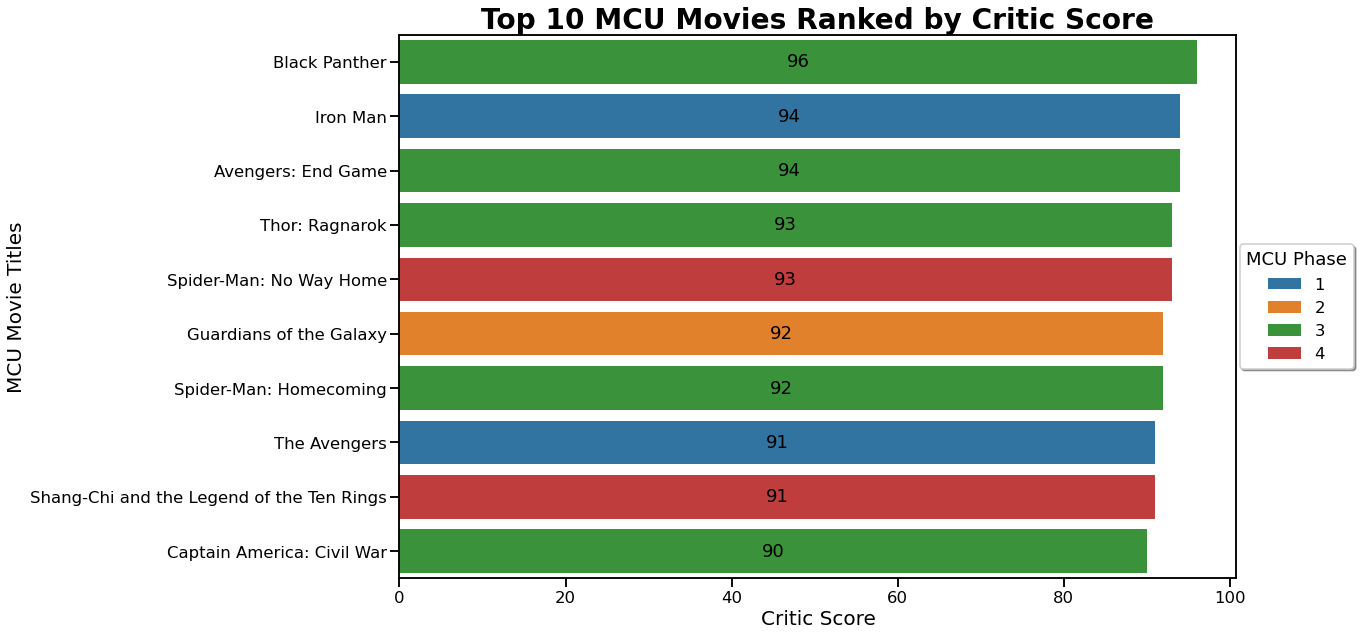

In [25]:
displayBarGraph(critic_ranked, 'tomato_meter')

### Viewer Ratings

In [26]:
standings = addPointsToStandings(viewer_rating['movie_title'], standings)
print(standings)

Counter({'Spider-Man: No Way Home': 126, 'Avengers: End Game': 124, 'The Avengers': 111, 'Avengers: Infinity War': 110, 'Black Panther': 104, 'Captain America: Civil War': 94, 'Spider-Man: Far From Home': 91, 'Guardians of the Galaxy': 85, 'Spider-Man: Homecoming': 85, 'Thor: Ragnarok': 85, 'Avengers: Age of Ultron': 83, 'Iron Man 3': 80, 'Captain America: The Winter Soldier': 80, 'Guardians of the Galaxy Vol. 2': 78, 'Iron Man': 76, 'Captain Marvel': 66, 'Doctor Strange': 61, 'Shang-Chi and the Legend of the Ten Rings': 61, 'Ant-Man and the Wasp': 51, 'Black Widow': 43, 'Iron Man 2': 42, 'Ant-Man': 39, 'Thor: The Dark World': 38, 'Thor': 28, 'Captain America: The First Avenger': 21, 'Eternals': 20, 'The Incredible Hulk': 8})


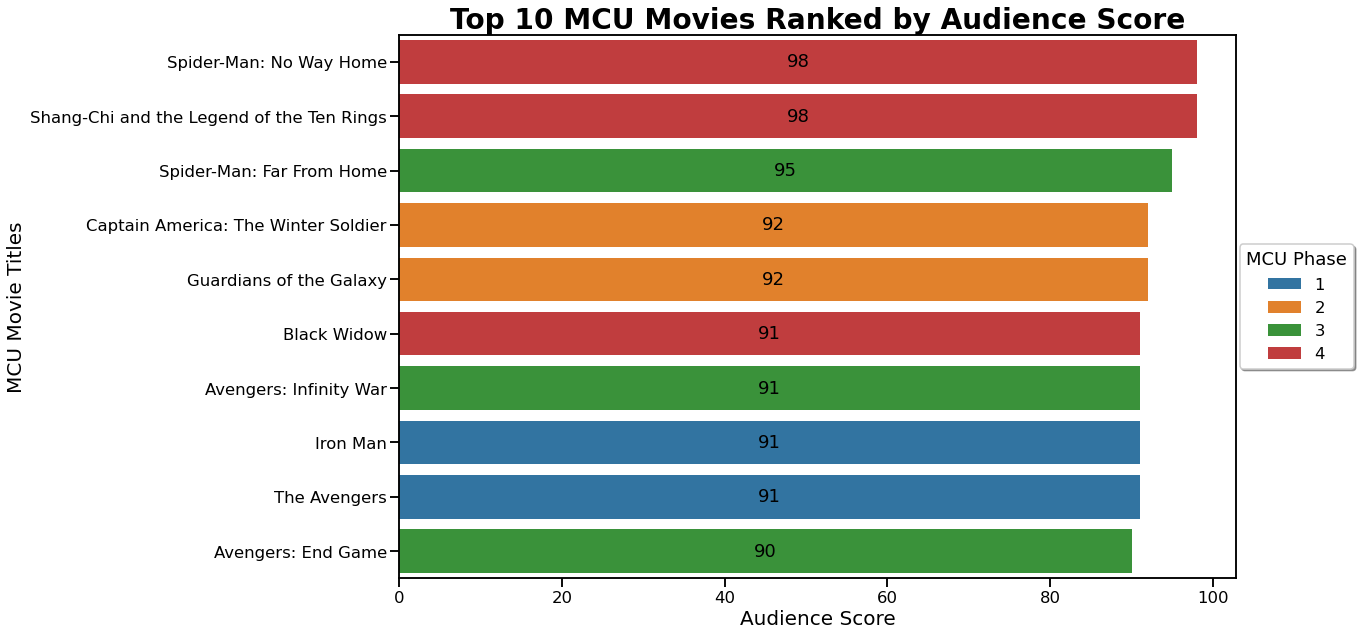

In [27]:
displayBarGraph(viewer_rating, 'audience_score')

### Phase Evaluations - May or May Not Use

In [28]:
mcu_data['points_scored'] = standings.values()

In [29]:
mcu_data.sort_index(axis=0, ascending=True)

,movie_title,mcu_phase,release_date,tomato_meter,audience_score,movie_duration,production_budget,opening_weekend,domestic_box_office,worldwide_box_office,net_profit,points_scored
0,Iron Man,1,2008-05-02,94,91,126,186000000,102118668,318604126,585171547,399171547,76
1,The Incredible Hulk,1,2008-06-13,67,70,112,137500000,55414050,134806913,265573859,128073859,8
2,Iron Man 2,1,2010-05-07,72,71,124,170000000,128122480,312433331,621156389,451156389,42
3,Thor,1,2011-05-06,77,76,113,150000000,65723338,181030624,449326618,299326618,28
4,Captain America: The First Avenger,1,2011-07-22,79,75,124,140000000,65058524,176654505,370569776,230569776,21
5,The Avengers,1,2012-05-04,91,91,143,225000000,207438708,623357910,1515100211,1290100211,111
6,Iron Man 3,2,2013-05-03,79,78,130,200000000,174144585,408992272,1215392272,1015392272,80
7,Thor: The Dark World,2,2013-11-08,66,75,111,150000000,85737841,206362140,644602516,494602516,38
8,Captain America: The Winter Soldier,2,2014-04-04,90,92,135,170000000,95023721,259746958,714401889,544401889,80
9,Guardians of the Galaxy,2,2014-08-01,92,92,121,170000000,94320883,333714112,770882395,600882395,85


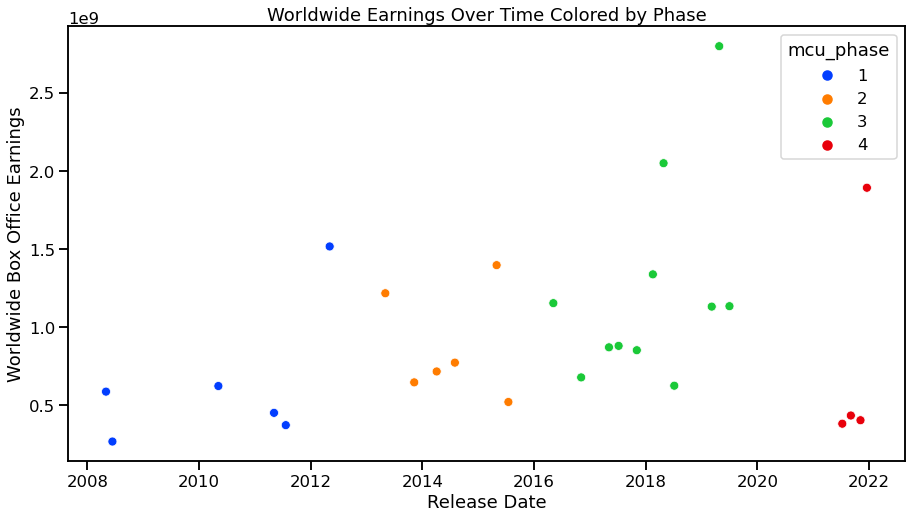

In [30]:
fig,ax = plt.subplots(figsize=(15,8))
sns.scatterplot(x='release_date', 
                y='worldwide_box_office', 
                hue='mcu_phase', 
                data=mcu_data, 
                palette='bright')
plt.ylabel('Worldwide Box Office Earnings')
plt.xlabel('Release Date')
plt.title('Worldwide Earnings Over Time Colored by Phase')
plt.show()

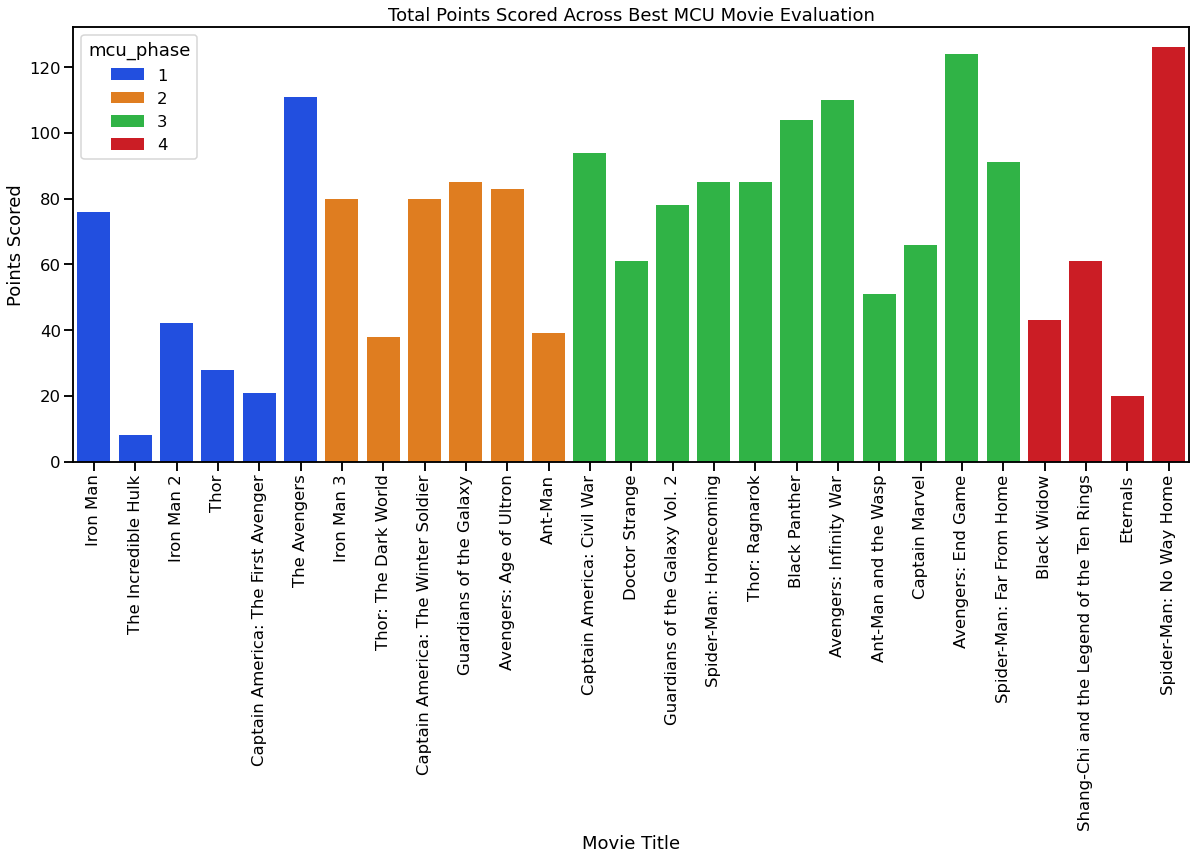

In [35]:
fig, ax = plt.subplots(figsize=(20,8))
sns.barplot(x='movie_title', 
            y='points_scored', 
            data=mcu_data, 
            hue='mcu_phase', 
            palette='bright',
            dodge=False)
plt.xticks(rotation=90)
plt.ylabel('Points Scored')
plt.xlabel('Movie Title')
plt.title('Total Points Scored Across Best MCU Movie Evaluation')
plt.savefig(f'./assets/charts/summary.png', dpi=fig.dpi, bbox_inches='tight')

In [32]:
phase_eval = mcu_data.groupby('mcu_phase').agg({
    'tomato_meter': 'mean',
    'audience_score': 'mean',
    'opening_weekend': 'mean',
    'worldwide_box_office': 'mean',
    'net_profit': 'mean',
    'points_scored': 'mean'
})

In [33]:
phase_eval

,tomato_meter,audience_score,opening_weekend,worldwide_box_office,net_profit,points_scored
mcu_phase,,,,,,
1,80.000000,79.000000,1.039793e+08,6.344831e+08,4.663997e+08,47.666667
2,81.000000,84.166667,1.162873e+08,8.765758e+08,6.790758e+08,67.500000
3,89.090909,83.363636,1.626475e+08,1.226752e+09,1.014480e+09,86.272727
4,77.500000,91.250000,1.217977e+08,7.762920e+08,5.887920e+08,62.500000


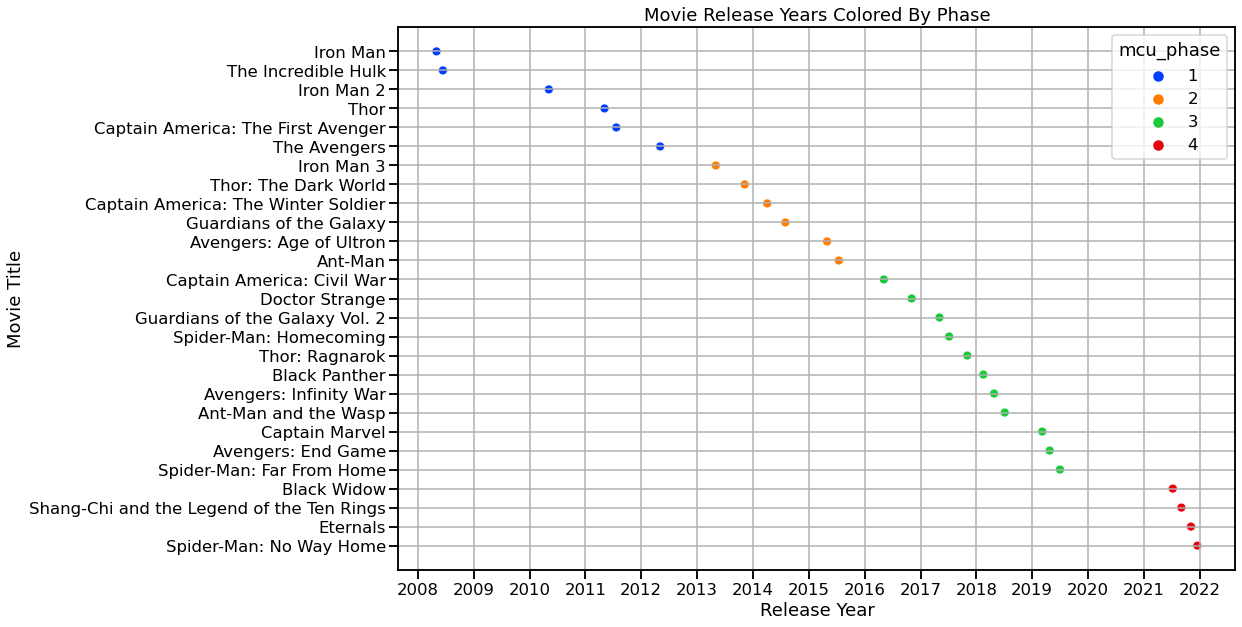

In [34]:
fig,ax = plt.subplots(figsize=(15,10))
sns.scatterplot(x='release_date',
             y='movie_title',
             hue='mcu_phase',
             data=mcu_data,
             palette='bright',
             ax=ax,
             markers='o',
            )
ax.xaxis.set_major_locator(mdates.YearLocator())
plt.ylabel('Movie Title')
plt.xlabel('Release Year')
plt.title('Movie Release Years Colored By Phase')
plt.grid()
plt.savefig('./assets/charts/movie_phases.png', dpi=fig.dpi, bbox_inches='tight')